In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Iris.csv')
X = dataset.iloc[:, 1:-1].values

In [3]:
dataset.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

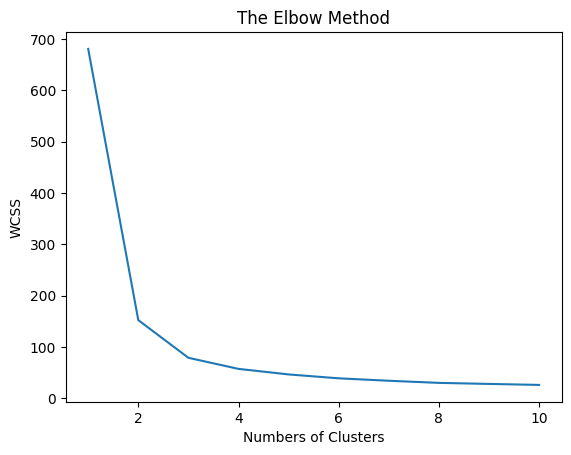

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Numbers of Clusters')
plt.ylabel('WCSS')
plt.show()

## The Elbow Method Shows That The Optimal Numbers of Cluster Should be 3.

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter=300, n_init=10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

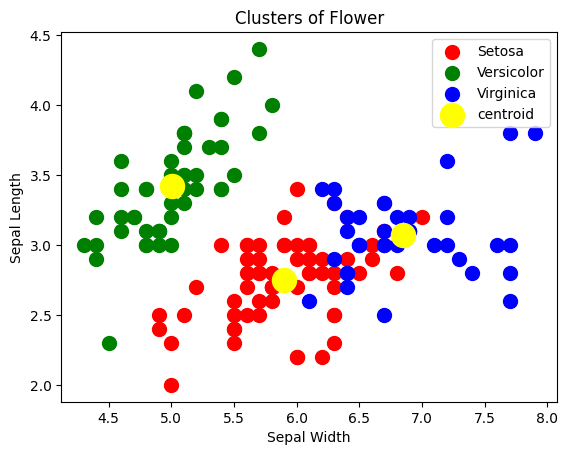

In [6]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centroid')
plt.title('Clusters of Flower')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.legend()
plt.show()


In [7]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_kmeans)

0.5525919445499757